<a href="https://colab.research.google.com/github/Jancerem/PDI-LAB/blob/main/LAB_PDI_Practica2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 2.- Procesamiento geométrico y procesamiento de histograma
**Miembros:**
*  Ingrid Edith Martínez Andrade - 1995361
*  Jan Carlos Morales Rivera - 1905790

# Objetivo
Realizar modificaciones a imágenes en el dominio del espacio, específicamente con dos tipos de procesamiento: geométrico y de histograma.

# Parte 0 - Importación de archivos y librerías
**Subir imagenes de radiografia y resonancia magnetica de rodilla**

In [4]:
from google.colab import files

uploaded = files.upload()

Saving Rodilla_radiografia.jpg to Rodilla_radiografia.jpg


In [12]:
from google.colab import files

uploaded = files.upload()

Saving rodilla_resonancia.jpg to rodilla_resonancia.jpg



**Importación de librerías**

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Parte I - Procesamiento geométrico
**Ejercicio 1: Traslación**

*   Cargar imagen médica

In [6]:
# Cargar imagen
img = cv2.imread('Rodilla_radiografia.jpg', cv2.IMREAD_GRAYSCALE)

*   Aplicar traslación (50, 30).


In [ ]:
# Traslación entera
M1 = np.float32([[1, 0, 50], [0, 1, 30]])
translated1 = cv2.warpAffine(img, M1, (img.shape[1], img.shape[0]))

*   Aplicar traslación (20.5, 15.5).

In [ ]:
# Traslación decimal
M2 = np.float32([[1, 0, 20.5], [0, 1, 15.5]])
translated2 = cv2.warpAffine(img, M2, (img.shape[1], img.shape[0]))

*   Mostrar imágenes.

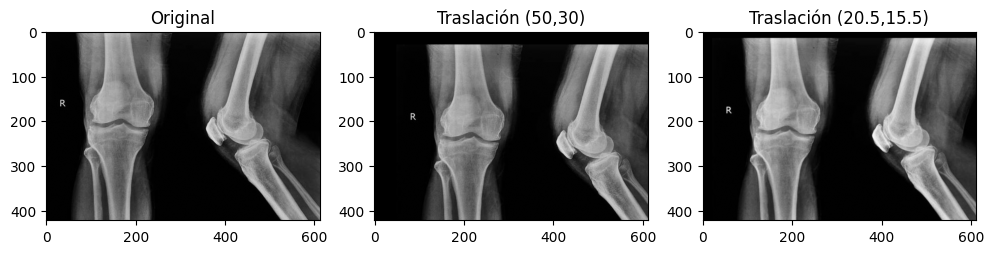

In [7]:
# Mostrar
plt.figure(figsize=(12,4))
plt.subplot(1,3,1), plt.imshow(img, cmap='gray'), plt.title('Original')
plt.subplot(1,3,2), plt.imshow(translated1, cmap='gray'), plt.title('Traslación (50,30)')
plt.subplot(1,3,3), plt.imshow(translated2, cmap='gray'), plt.title('Traslación (20.5,15.5)')
plt.show()

**Ejercicio 2: Rotación**

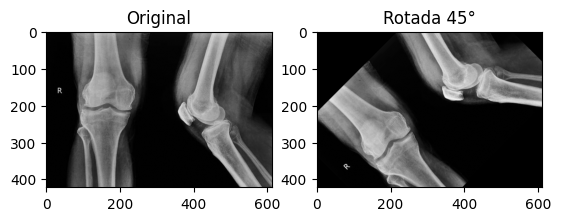

In [8]:
# Rotación 45° alrededor del centro
(h, w) = img.shape
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated = cv2.warpAffine(img, M, (w, h))

# Mostrar imagenes
plt.subplot(1,2,1), plt.imshow(img, cmap='gray'), plt.title('Original')
plt.subplot(1,2,2), plt.imshow(rotated, cmap='gray'), plt.title('Rotada 45°')
plt.show()

**Ejercicio 3: Escala**

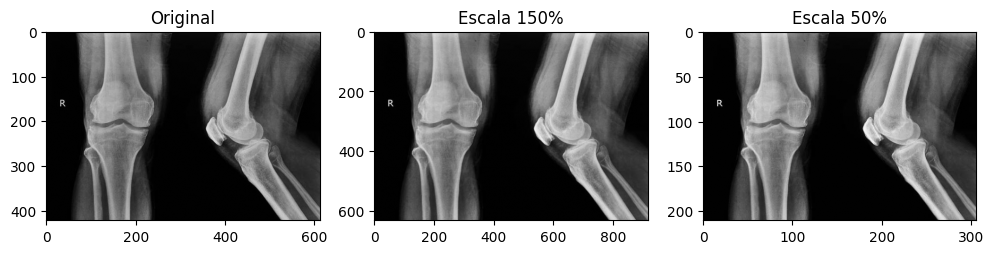

In [14]:
# Escalado al 150%
scaled_up = cv2.resize(img, None, fx=1.5, fy=1.5)

# Escalado al 50%
scaled_down = cv2.resize(img, None, fx=0.5, fy=0.5)

# Mostrar imagenes
plt.figure(figsize=(12,4))
plt.subplot(1,3,1), plt.imshow(img, cmap='gray'), plt.title('Original')
plt.subplot(1,3,2), plt.imshow(scaled_up, cmap='gray'), plt.title('Escala 150%')
plt.subplot(1,3,3), plt.imshow(scaled_down, cmap='gray'), plt.title('Escala 50%')
plt.show()

# Parte II- Ecualización de histograma

**Ejercicio 1: Ecualización**

*  Cargar imagen médica

In [ ]:
img2 = cv2.imread('rodilla_resonancia.jpg', cv2.IMREAD_GRAYSCALE)

*  Mostrar histograma original

<ipython-input-15-46f6ace8a81b>:2: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img2.ravel(), 256, [0,256])


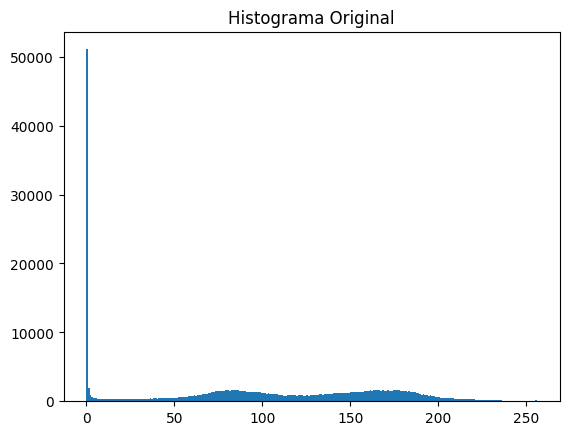

In [15]:
# Histograma original
plt.hist(img2.ravel(), 256, [0,256])
plt.title('Histograma Original')
plt.show()

*  Ecualización

In [16]:
# Ecualización
equalized = cv2.equalizeHist(img2)

*  Histograma mejorado por contraste

<ipython-input-17-7b416eecc2b0>:2: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(equalized.ravel(), 256, [0,256])


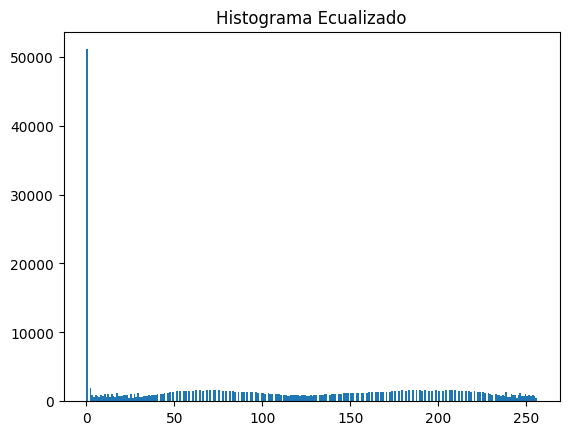

In [17]:
# Histograma mejorado
plt.hist(equalized.ravel(), 256, [0,256])
plt.title('Histograma Ecualizado')
plt.show()

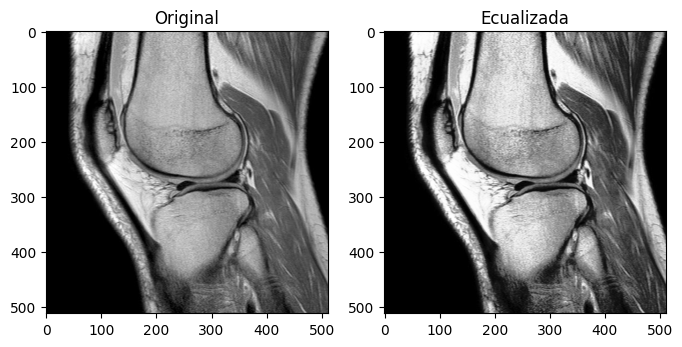

In [18]:
# Mostrar imágenes
plt.figure(figsize=(8,4))
plt.subplot(1,2,1), plt.imshow(img2, cmap='gray'), plt.title('Original')
plt.subplot(1,2,2), plt.imshow(equalized, cmap='gray'), plt.title('Ecualizada')
plt.show()